## Breast Cancer Recurrence Detection

In [ ]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
df = pd.read_excel('/content/Clinical_and_Other_Features.xlsx')

In [ ]:
df.head()


,Date of Birth (Days),Menopause (at diagnosis),Metastatic at Presentation (Outside of Lymph Nodes),ER,PR,HER2,Mol Subtype,Oncotype score,Staging(Tumor Size)# [T],Staging(Nodes)#(Nx replaced by -1)[N],...,Therapeutic or Prophylactic Oophorectomy as part of Endocrine Therapy,Neoadjuvant Anti-Her2 Neu Therapy,Adjuvant Anti-Her2 Neu Therapy,Received Neoadjuvant Therapy or Not,Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure)
0,-15209,0,0,0,0,1,2,NaN,2.0,1.0,...,1,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
1,-14061,0,0,0,0,0,3,NaN,2.0,0.0,...,0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0
2,-22685,1,0,1,1,0,0,8.0,2.0,1.0,...,0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,-21479,1,0,1,1,0,0,14.0,1.0,0.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,-13932,0,0,1,0,1,1,NaN,2.0,1.0,...,0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 56 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Date of Birth (Days)                                                                                                                                                  922 non-null    int64  
 1   Menopause (at diagnosis)                                                                                                                                              922 non-null    int64  
 2   Metastatic at Presentation (Outside of Lymph Nodes)                                                           

#  Data Preprocessing

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [x.replace('(', '') for x in df.columns]
df.columns = [y.replace(')', '') for y in df.columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 56 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   Date_of_Birth_Days                                                                                                                                               922 non-null    int64  
 1   Menopause_at_diagnosis                                                                                                                                           922 non-null    int64  
 2   Metastatic_at_Presentation_Outside_of_Lymph_Nodes                                                                                 

In [ ]:
df['Recurrence_event'].value_counts()

0.0    833
1.0     87
Name: Recurrence_event, dtype: int64

In [ ]:
df.dtypes

Date_of_Birth_Days                                                                                                                                                   int64
Menopause_at_diagnosis                                                                                                                                               int64
Metastatic_at_Presentation_Outside_of_Lymph_Nodes                                                                                                                    int64
ER                                                                                                                                                                   int64
PR                                                                                                                                                                   int64
HER2                                                                                                                                             

In [ ]:
# Creating a subset for local or distant

In [ ]:
subset = df[df['Recurrence_event'] == 1]


In [ ]:
subset.loc[subset['Days_to_local_recurrence_from_the_date_of_diagnosis_'] == 'NP', 'Days_to_local_recurrence_from_the_date_of_diagnosis_'] = np.nan



In [ ]:
subset.loc[subset['Days_to_distant_recurrencefrom_the_date_of_diagnosis_'] == 'NP', 'Days_to_distant_recurrencefrom_the_date_of_diagnosis_'] = np.nan



In [ ]:
# create new column 'type' based on 'local' and 'distant' columns
subset['type'] = np.where(subset['Days_to_local_recurrence_from_the_date_of_diagnosis_'].notnull(), '0', '1')



<ipython-input-239-157415e87bf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['type'] = np.where(subset['Days_to_local_recurrence_from_the_date_of_diagnosis_'].notnull(), '0', '1')


In [ ]:
subset['type']

9      1
11     1
27     1
41     1
42     1
      ..
868    1
873    1
898    1
915    1
916    1
Name: type, Length: 87, dtype: object

In [ ]:
subset['type'] = subset['type'].astype(int)


<ipython-input-241-2a9c3953f05e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['type'] = subset['type'].astype(int)


In [ ]:
subset['type'].value_counts()

1    71
0    16
Name: type, dtype: int64

In [ ]:

# encoding Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
subset.iloc[:,1] = le.fit_transform(subset.iloc[:,1].values)

subset = pd.get_dummies(subset)

subset=subset.replace(np.nan,0)

subset = subset.abs()

subset = subset[np.isfinite(subset).all(1)]



<ipython-input-243-b03ea97f0513>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.iloc[:,1] = le.fit_transform(subset.iloc[:,1].values)
<ipython-input-243-b03ea97f0513>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  subset = pd.get_dummies(subset)
<ipython-input-243-b03ea97f0513>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  subset = pd.get_dummies(subset)


** Test train split for local distant **

```
# This is formatted as code
```



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
subset.dtypes

Date_of_Birth_Days                                   int64
Menopause_at_diagnosis                               int64
Metastatic_at_Presentation_Outside_of_Lymph_Nodes    int64
ER                                                   int64
PR                                                   int64
                                                     ...  
Tumor_Size_cm_[0.5]                                  uint8
Number_of_Ovaries_In_Situ_\n_0                       uint8
Number_of_Ovaries_In_Situ_\n_1                       uint8
Number_of_Ovaries_In_Situ_\n_2                       uint8
Number_of_Ovaries_In_Situ_\n_NP                      uint8
Length: 464, dtype: object

In [ ]:
x1 = subset.drop(['type'], axis=1)
y1 = subset['type'].values

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [ ]:
# Support Vactor
from sklearn.svm import SVC
svm =  SVC(random_state=10)
svm1 = SVC(kernel='linear',gamma='scale',random_state=10)
svm2 = SVC(kernel='rbf',gamma='scale',random_state=10)
svm3 = SVC(kernel='poly',gamma='scale',random_state=10)
svm4 = SVC(kernel='sigmoid',gamma='scale',random_state=10)

svm.fit(x1_train,y1_train)
svm1.fit(x1_train,y1_train)
svm2.fit(x1_train,y1_train)
svm3.fit(x1_train,y1_train)
svm4.fit(x1_train,y1_train)

print('SVC Accuracy : {:,.2f}%'.format(svm.score(x1_test,y1_test)*100))

print('SVC Linear Accuracy : {:,.2f}%'.format(svm1.score(x1_test,y1_test)*100))

print('SVC RBF Accuracy : {:,.2f}%'.format(svm2.score(x1_test,y1_test)*100))

print('SVC Poly Accuracy : {:,.2f}%'.format(svm3.score(x1_test,y1_test)*100))

print('SVC Sigmoid Accuracy : {:,.2f}%'.format(svm4.score(x1_test,y1_test)*100))

SVC Accuracy : 83.33%
SVC Linear Accuracy : 83.33%
SVC RBF Accuracy : 83.33%
SVC Poly Accuracy : 83.33%
SVC Sigmoid Accuracy : 83.33%


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      1.00      0.91        15

    accuracy                           0.83        18
   macro avg       0.42      0.50      0.45        18
weighted avg       0.69      0.83      0.76        18



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# encoding Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1].values)

In [ ]:
df

,Date_of_Birth_Days,Menopause_at_diagnosis,Metastatic_at_Presentation_Outside_of_Lymph_Nodes,ER,PR,HER2,Mol_Subtype,Oncotype_score,StagingTumor_Size#_[T],StagingNodes#Nx_replaced_by_-1[N],...,Therapeutic_or_Prophylactic_Oophorectomy_as_part_of_Endocrine_Therapy_,Neoadjuvant_Anti-Her2_Neu_Therapy,Adjuvant_Anti-Her2_Neu_Therapy_,Received_Neoadjuvant_Therapy_or_Not,Pathologic_response_to_Neoadjuvant_therapy:_Pathologic_stage_T_following_neoadjuvant_therapy_,Pathologic_response_to_Neoadjuvant_therapy:__Pathologic_stage_N_following_neoadjuvant_therapy,Pathologic_response_to_Neoadjuvant_therapy:__Pathologic_stage_M_following_neoadjuvant_therapy_,Overall_Near-complete_Response:__Stricter_Definition,Overall_Near-complete_Response:__Looser_Definition,Near-complete_Response_Graded_Measure
0,-15209,0,0,0,0,1,2,NaN,2.0,1.0,...,1,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
1,-14061,0,0,0,0,0,3,NaN,2.0,0.0,...,0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0
2,-22685,1,0,1,1,0,0,8.0,2.0,1.0,...,0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,-21479,1,0,1,1,0,0,14.0,1.0,0.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,-13932,0,0,1,0,1,1,NaN,2.0,1.0,...,0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,-24183,1,0,1,1,0,0,NaN,2.0,2.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
918,-27677,1,0,1,1,0,0,22.0,1.0,0.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
919,-22792,1,0,1,1,0,0,9.0,1.0,0.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
920,-14884,0,0,1,1,0,0,NaN,2.0,1.0,...,0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df=df.replace(np.nan,0)

In [ ]:
df = df.abs()


In [ ]:
df = df[np.isfinite(df).all(1)]


In [ ]:
df['Recurrence_event']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
917    0.0
918    0.0
919    0.0
920    0.0
921    0.0
Name: Recurrence_event, Length: 922, dtype: float64

**Train test split for recurrence**

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Recurrence_event'], axis=1)
y = df['Recurrence_event'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))

False
True


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

NameError: ignored

**Model Building**

In [ ]:
# Support Vactor
from sklearn.svm import SVC
svm =  SVC(random_state=10)
svm1 = SVC(kernel='linear',gamma='scale',random_state=10)
svm2 = SVC(kernel='rbf',gamma='scale',random_state=10)
svm3 = SVC(kernel='poly',gamma='scale',random_state=10)
svm4 = SVC(kernel='sigmoid',gamma='scale',random_state=10)

svm.fit(x_train,y_train)
svm1.fit(x_train,y_train)
svm2.fit(x_train,y_train)
svm3.fit(x_train,y_train)
svm4.fit(x_train,y_train)

print('SVC Accuracy : {:,.2f}%'.format(svm.score(x_test,y_test)*100))

print('SVC Linear Accuracy : {:,.2f}%'.format(svm1.score(x_test,y_test)*100))

print('SVC RBF Accuracy : {:,.2f}%'.format(svm2.score(x_test,y_test)*100))

print('SVC Poly Accuracy : {:,.2f}%'.format(svm3.score(x_test,y_test)*100))

print('SVC Sigmoid Accuracy : {:,.2f}%'.format(svm4.score(x_test,y_test)*100))




SVC Accuracy : 89.73%
SVC Linear Accuracy : 89.19%
SVC RBF Accuracy : 89.73%
SVC Poly Accuracy : 89.73%
SVC Sigmoid Accuracy : 89.19%


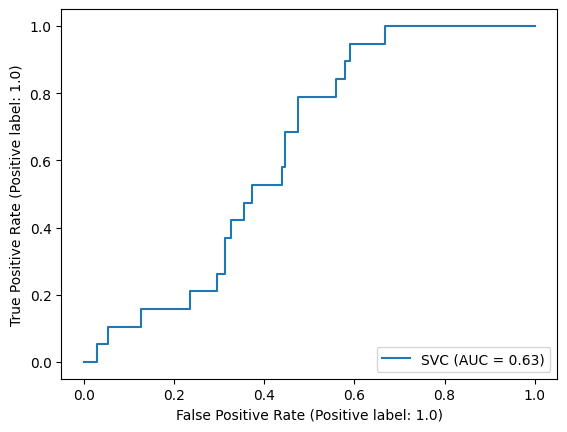

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svm, x_test, y_test)
plt.show()

In [ ]:
# GRId search cv

In [ ]:
from sklearn.model_selection import GridSearchCV
#Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#Create a GridSearchCV object and fit it to the training data

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)


SVC(C=1, gamma=0.01, kernel='sigmoid')


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
grid_predictions = grid.predict(x_test)
#print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       166
         1.0       0.86      1.00      0.93        19

    accuracy                           0.98       185
   macro avg       0.93      0.99      0.96       185
weighted avg       0.99      0.98      0.98       185



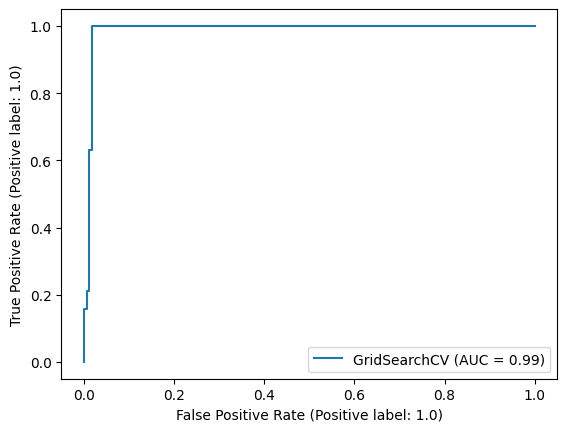

In [ ]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(grid, x_test, y_test)
plt.show()